# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
import os
local_path = '/Users/riccardo/Documents/GitHub/' #'path_to_progect_folder/'
sys.path.append(local_path+'OptimalControlAttacks/SyntheticDataExperiments/')
from Modules import GreedyAttacks as GA
from Parameters import ParametersGreedyAttacks_LinearRegression as Par

# Colors

In [3]:
light_red = '#fcb1be'
red = '#F73B5C'
blue = '#125D98'

# Parameters

In [4]:
# Activation
activation = Par.activation

# Input data parameters
dim_input = Par.dim_input
mu_x = Par.mu_x
sigma_x = Par.sigma_x


# Dynamics parameters
learning_rate = Par.learning_rate
gamma = Par.gamma
beta = Par.beta


# N. samples
n_timesteps = Par.n_timesteps
n_timesteps_transient_th = Par.n_timesteps_transient_th 
n_timesteps_past = Par.n_timesteps_past
n_samples_average = Par.n_samples_average
n_samples_buffer = Par.n_samples_buffer
n_samples_test = Par.n_samples_test


# Control parameters
a_min = Par.a_min
a_max = Par.a_max
control_cost_weight = Par.control_cost_weight
control_cost_weight_arr = Par.control_cost_weight_arr
greedy_weight_future_linear = Par.dim_input/learning_rate
#fut_pref = Par.fut_pref
opt_pref = False


# N. averages
n_runs_experiments = Par.n_runs_experiments
n_runs_calibration = Par.n_runs_calibration


# Test sets
x_test = np.random.normal(mu_x, sigma_x, (n_samples_test, dim_input))

# Single run

In [6]:
# Teacher
w_teach = np.random.normal(0, 1, dim_input)
w_teach = w_teach/(np.sum(w_teach**2)/dim_input)**0.5

# Target
w_target = -w_teach

# Student (initial condition)
w_stud_0 = w_teach

# Weight control
d_teach_target = 0.5 * np.mean((GA.perceptron(w_teach, x_test, activation=activation)-GA.perceptron(w_target, x_test, activation=activation))**2)
control_cost_weight_l = control_cost_weight * (2*d_teach_target)

In [12]:
# run greedy experiment
fut_pref = 1.
opt_pref = False
fut_pref_interval = 0.1
fut_pref_min = 0.7
fut_pref_max = 1.2 + fut_pref_interval

# Arrays 
batch_size = 1
x_incoming = np.random.normal(mu_x, sigma_x, (batch_size*n_timesteps, dim_input))
x_past = np.random.normal(mu_x, sigma_x, (batch_size*n_timesteps_past, dim_input))
x_buffer = np.random.normal(mu_x, sigma_x, (batch_size*n_samples_buffer, dim_input))

print('Multi-dim control, P=%d'%batch_size)
results_greedy_P1 = GA.exp_greedy_perceptron(x_incoming=x_incoming, x_past=x_past, x_buffer=x_buffer, x_test=x_test,
                                             dim_input=dim_input,
                                             w_teach=w_teach, w_target=w_target, w_stud_0=w_stud_0,
                                             eta=learning_rate, beta=beta, control_cost_weight=control_cost_weight,
                                             a_min=a_min, a_max=a_max, batch_size=batch_size, 
                                             weight_future=greedy_weight_future_linear,
                                             buffer_size=n_samples_average, activation=activation, 
                                             transient_th=n_timesteps_transient_th, fut_pref=fut_pref,
                                             opt_pref=opt_pref, fut_pref_interval=fut_pref_interval,
                                             fut_pref_min=fut_pref_min, fut_pref_max=fut_pref_max, 
                                             n_av=n_runs_calibration, n_gridpoints=51)

# Arrays 
batch_size_large = 10
x_incoming = np.random.normal(mu_x, sigma_x, (batch_size_large*n_timesteps, dim_input))
x_past = np.random.normal(mu_x, sigma_x, (batch_size_large*n_timesteps_past, dim_input))
x_buffer = np.random.normal(mu_x, sigma_x, (batch_size_large*n_samples_buffer, dim_input))

print('One-dim control, P=%d'%batch_size_large)
results_greedy_Plarge_batchcontrol = GA.exp_greedy_perceptron(x_incoming=x_incoming, x_past=x_past, x_buffer=x_buffer, x_test=x_test,
                                                               dim_input=dim_input,
                                                               w_teach=w_teach, w_target=w_target, w_stud_0=w_stud_0,
                                                               eta=learning_rate, beta=beta, control_cost_weight=control_cost_weight,
                                                               a_min=a_min, a_max=a_max, batch_size=batch_size_large, 
                                                               weight_future=greedy_weight_future_linear,
                                                               buffer_size=n_samples_average, activation=activation, 
                                                               transient_th=n_timesteps_transient_th, fut_pref=fut_pref,
                                                               opt_pref=opt_pref, fut_pref_interval=fut_pref_interval,
                                                               fut_pref_min=fut_pref_min, fut_pref_max=fut_pref_max, 
                                                               n_av=n_runs_calibration, n_gridpoints=51)

print('Multi-dim control, P=%d'%batch_size_large)
results_greedy_Plarge = GA.exp_greedy_perceptron_multidimcontrol(x_incoming=x_incoming, x_past=x_past, x_buffer=x_buffer, x_test=x_test,
                                                                 dim_input=dim_input,
                                                                 w_teach=w_teach, w_target=w_target, w_stud_0=w_stud_0,
                                                                 eta=learning_rate, beta=beta, control_cost_weight=control_cost_weight,
                                                                 a_min=a_min, a_max=a_max, batch_size=batch_size_large, 
                                                                 weight_future=greedy_weight_future_linear,
                                                                 buffer_size=n_samples_average, activation=activation, 
                                                                 transient_th=n_timesteps_transient_th, fut_pref=fut_pref,
                                                                 opt_pref=opt_pref, fut_pref_interval=fut_pref_interval,
                                                                 fut_pref_min=fut_pref_min, fut_pref_max=fut_pref_max, 
                                                                 n_av=n_runs_calibration, n_gridpoints=51)

Multi-dim control, P=1
3.7078254625679583
Training...
1/5000
500/5000
1000/5000
1500/5000
2000/5000
2500/5000
3000/5000
3500/5000
4000/5000
4500/5000
5000/5000
One-dim control, P=10
3.7078254625679583
Training...
1/5000
500/5000
1000/5000
1500/5000
2000/5000
2500/5000
3000/5000
3500/5000
4000/5000
4500/5000
5000/5000
Multi-dim control, P=10
3.7078254625679583
Training...
1/5000
500/5000
1000/5000
1500/5000
2000/5000
2500/5000
3000/5000
3500/5000
4000/5000
4500/5000
5000/5000


In [13]:
# Results
nef_cost_dynamics_greedy_P1 = results_greedy_P1['nef_cost_dynamics']
per_cost_dynamics_greedy_P1 = results_greedy_P1['per_cost_dynamics']
d_dynamics_greedy_P1 = results_greedy_P1['d_dynamics']

nef_cost_dynamics_greedy_Plarge_batchcontrol = results_greedy_Plarge_batchcontrol['nef_cost_dynamics']
per_cost_dynamics_greedy_Plarge_batchcontrol = results_greedy_Plarge_batchcontrol['per_cost_dynamics']
d_dynamics_greedy_Plarge_batchcontrol = results_greedy_Plarge_batchcontrol['d_dynamics']

nef_cost_dynamics_greedy_Plarge = results_greedy_Plarge['nef_cost_dynamics']
per_cost_dynamics_greedy_Plarge = results_greedy_Plarge['per_cost_dynamics']
d_dynamics_greedy_Plarge = results_greedy_Plarge['d_dynamics']

## Plot

Av. steady-state distance:

P=1:   0.71
P=10*: 0.71
P=10:  0.56



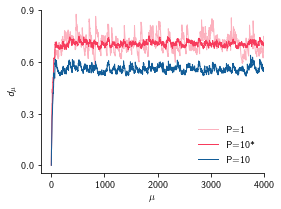

In [31]:
# Plot single realizations
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams["figure.figsize"] = (4,3)
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')

timesteps = np.arange(n_timesteps)
t_max = 4000

print('Av. steady-state distance:\n')
d_dynamics = d_dynamics_greedy_P1
print('P=%d:   %.2f' % (batch_size, np.mean(d_dynamics[-2500:])))
plt.plot(timesteps[:t_max], d_dynamics[:t_max], color=light_red, linestyle='-', lw=1, label='P=%d'%batch_size)

d_dynamics = d_dynamics_greedy_Plarge
print('P=%d*: %.2f' % (batch_size_large, np.mean(d_dynamics[-2500:])))
plt.plot(timesteps[:t_max], d_dynamics[:t_max], color=red, linestyle='-', lw=1, label='P=%d*'%batch_size_large)

d_dynamics = d_dynamics_greedy_Plarge_batchcontrol
print('P=%d:  %.2f\n' % (batch_size_large, np.mean(d_dynamics[-2500:])))
plt.plot(timesteps[:t_max], d_dynamics[:t_max], color=blue, linestyle='-', lw=1, label='P=%d'%batch_size_large)

plt.ylim([-0.045, .9])
plt.xlim([-200, 4000])
plt.yticks([0, 0.3, 0.6, 0.9])
plt.xlabel('$\mu$')
plt.ylabel('$d_{\mu}$')
plt.legend(frameon=False)
plt.grid(False)
plt.show()